Create common Pandas Dataframe with all Data to do further analysis

In [5]:
import pandas as pd

# Load the CSV files
file1 = '/workspaces/bakery_sales_prediction/0_DataPreparation/umsatzdaten_gekuerzt.csv'
file2 = '/workspaces/bakery_sales_prediction/0_DataPreparation/wetter.csv'
file3 = '/workspaces/bakery_sales_prediction/0_DataPreparation/kiwo.csv'

umsatz = pd.read_csv(file1)
wetter = pd.read_csv(file2)
kiwo = pd.read_csv(file3)

Create date time from text string

In [6]:
# Convert 'Datum' to datetime format in all datasets
umsatz['Datum'] = pd.to_datetime(umsatz['Datum'])
wetter['Datum'] = pd.to_datetime(wetter['Datum'])
kiwo['Datum'] = pd.to_datetime(kiwo['Datum'])


Merge data sets

In [8]:
# Merge the datasets on the "Datum" column
merged_df = pd.merge(umsatz, wetter, on='Datum', how='outer')
merged_df = pd.merge(merged_df, kiwo, on='Datum', how='outer')

# Display the first few rows of the merged dataframe
merged_df.head()

,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche
0,2012-01-01,NaN,NaN,8.0,9.8250,14.0,58.0,NaN
1,2012-01-02,NaN,NaN,7.0,7.4375,12.0,NaN,NaN
2,2012-01-03,NaN,NaN,8.0,5.5375,18.0,63.0,NaN
3,2012-01-04,NaN,NaN,4.0,5.6875,19.0,80.0,NaN
4,2012-01-05,NaN,NaN,6.0,5.3000,23.0,80.0,NaN


Create overview about missing data

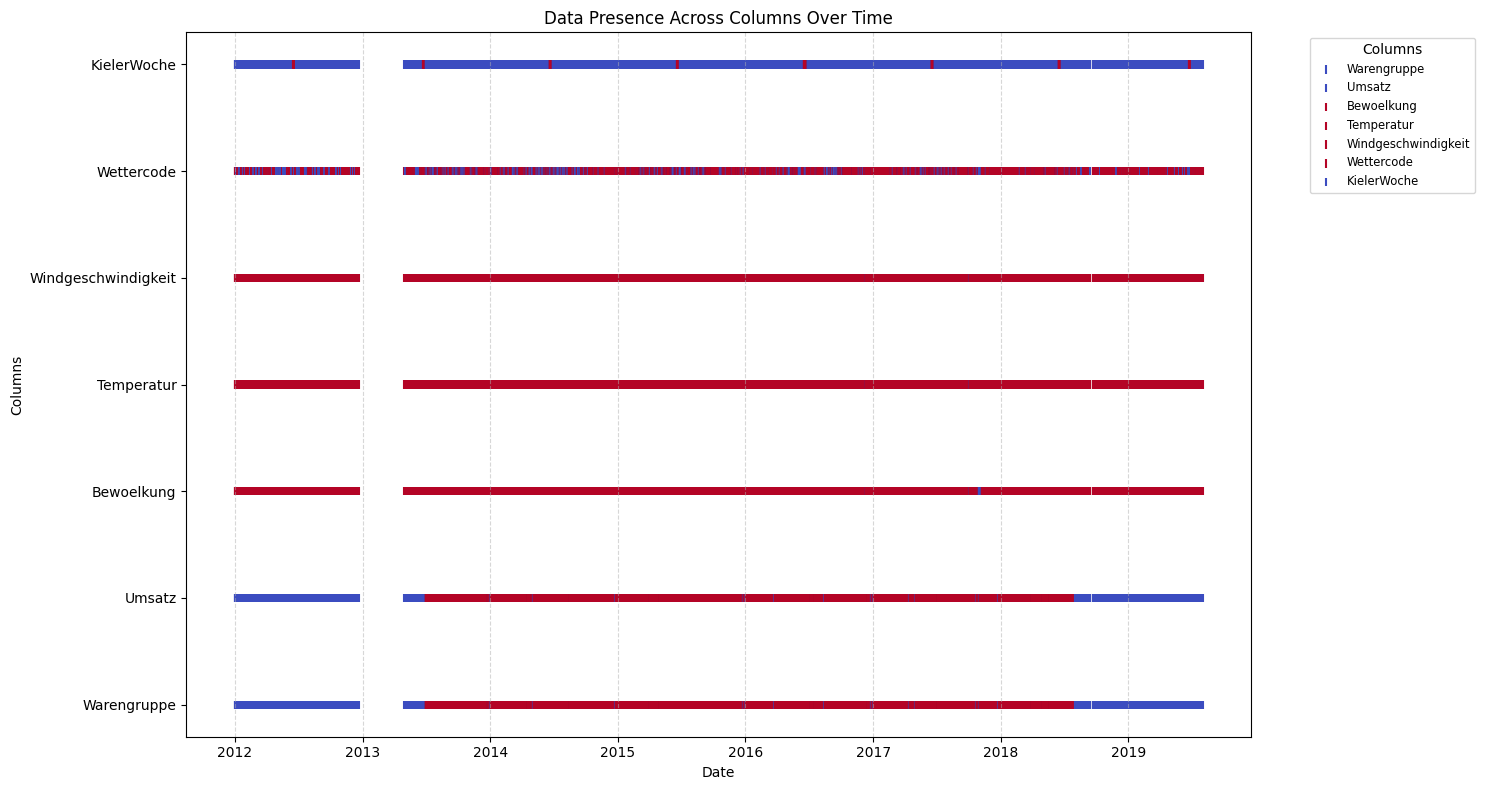

In [9]:
import matplotlib.pyplot as plt

# Prepare data for visualization
columns = merged_df.columns.drop('Datum')  # Exclude the date column
dates = pd.to_datetime(merged_df['Datum'])

# Create a binary representation for data presence (1 if data is present, 0 otherwise)
presence_data = merged_df[columns].notna().astype(int)
presence_data['Datum'] = dates

# Reshape data for plotting
melted_data = presence_data.melt(id_vars='Datum', var_name='Column', value_name='Has Data')

# Plotting
plt.figure(figsize=(15, 8))
for i, column in enumerate(columns):
    column_data = melted_data[melted_data['Column'] == column]
    plt.scatter(
        column_data['Datum'], 
        [i] * len(column_data), 
        c=column_data['Has Data'], 
        cmap='coolwarm', 
        label=column, 
        marker='|'
    )

# Customizing the plot
plt.yticks(range(len(columns)), columns)
plt.xlabel("Date")
plt.ylabel("Columns")
plt.title("Data Presence Across Columns Over Time")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(title="Columns", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')
plt.tight_layout()
plt.show()


save common data frame

In [11]:
# Save the merged dataframe to a CSV file
merged_df.to_csv('/workspaces/bakery_sales_prediction/0_DataPreparation/01_merged_data.csv', index=False)